# Draft analysis 

---

Group name: Lena Breitberg, Ji Huixiao, Paraskevas Papadopoulos

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Daten

## Daten importieren

In [2]:
# Daten importieren
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg.csv"
df = pd.read_csv(ROOT + DATA)

### Datenstruktur

In [3]:
# Zeige die ersten Zeilen
pd.set_option('display.max_columns', None)
df.head()

General.EstateTypeKey General.ReferenceNumber General.DistributionTypeKey  \
0               WOHNUNG             001/G1/E114                    ZUM_KAUF   
1               WOHNUNG                     NaN                    ZUM_KAUF   
2               WOHNUNG                     NaN                    ZUM_KAUF   
3               WOHNUNG                  X4_301                    ZUM_KAUF   
4               WOHNUNG                  X4_204                    ZUM_KAUF   

   General.ConstructionYear  General.LivingSpace  Tealium.object_locationid  \
0                    2023.0               247.07                     493480   
1                    1900.0                69.00                     493430   
2                    1972.0                69.46                     493465   
3                    2023.0                82.81                     493524   
4                    2023.0                75.52                     493524   

   Tealium.object_address_is_visible  Tealium.object_zip  \
0                               True               90482   
1                              False               90461   
2                              False               90473   
3                               True               90429   
4                               True               90429   

  Tealium.object_currency                            Tealium.object_features  \
0                     EUR  ['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...   
1                     EUR  ['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...   
2                     EUR  ['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...   
3                     EUR  ['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...   
4                     EUR  ['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...   

  Tealium.object_objektart_sub Tealium.expose_type  Tealium.broker_guid  \
0                      wohnung             project              4821481   
1                   MAISONETTE            standard              2704438   
2                      wohnung            standard              7111707   
3                      wohnung             project                53124   
4                      wohnung             project                53124   

   Tealium.object_count_photos  LocalRatings.scores.local_amenities  \
0                         15.0                                  7.7   
1                         23.0                                  6.5   
2                          1.0                                  5.7   
3                          6.0                                  8.2   
4                          6.0                                  8.2   

   LocalRatings.scores.mobility  \
0                           9.5   
1                           9.7   
2                           7.8   
3                           9.6   
4                           9.6   

                                         MetaBadges  \
0  [{'label': 'Provisionsfrei', 'highlight': True}]   
1                                                []   
2                                                []   
3  [{'label': 'Provisionsfrei', 'highlight': True}]   
4  [{'label': 'Provisionsfrei', 'highlight': True}]   

  Price.AdditionalInformation.Commission.CommissionType EstateAddress.City  \
0                                    COMMISSION_FREE              Nürnberg   
1                                COMMISSION_REQUIRED              Nürnberg   
2                                 COMMISSION_DEFAULT              Nürnberg   
3                                    COMMISSION_FREE              Nürnberg   
4                                    COMMISSION_FREE              Nürnberg   

   EstateAddress.ZipCode EstateAddress.Street  \
0                  90482     Ostendstraße 120   
1                  90461                  NaN   
2                  90473                  NaN   
3                  90429  Maximilianstraße 56   
4                  90429  Maximilianstraße 56   

                Offerer.ad

In [4]:
# Datenübersicht (mit Metadaten)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   General.EstateTypeKey                                  961 non-null    object 
 1   General.ReferenceNumber                                832 non-null    object 
 2   General.DistributionTypeKey                            961 non-null    object 
 3   General.ConstructionYear                               961 non-null    float64
 4   General.LivingSpace                                    961 non-null    float64
 5   Tealium.object_locationid                              961 non-null    int64  
 6   Tealium.object_address_is_visible                      961 non-null    bool   
 7   Tealium.object_zip                                     961 non-null    int64  
 8   Tealium.object_currency                           

In [5]:
# Zeige alle Variablen im Datensatz
df.columns

Index(['General.EstateTypeKey', 'General.ReferenceNumber',
       'General.DistributionTypeKey', 'General.ConstructionYear',
       'General.LivingSpace', 'Tealium.object_locationid',
       'Tealium.object_address_is_visible', 'Tealium.object_zip',
       'Tealium.object_currency', 'Tealium.object_features',
       'Tealium.object_objektart_sub', 'Tealium.expose_type',
       'Tealium.broker_guid', 'Tealium.object_count_photos',
       'LocalRatings.scores.local_amenities', 'LocalRatings.scores.mobility',
       'MetaBadges', 'Price.AdditionalInformation.Commission.CommissionType',
       'EstateAddress.City', 'EstateAddress.ZipCode', 'EstateAddress.Street',
       'Offerer.addressGuid', 'Offerer.globalUserId',
       'Offerer.contactData.companyName', 'Project.Address.PostCode',
       'Project.Address.Street', 'Project.Address.HouseNumber', 'Latitude',
       'Longitude', 'Stadtteil', 'Stadt', 'PRICE', 'ROOMS',
       'PRICE_COMMONCHARGE', 'EnergyType', 'Class', 'Value', 'CATEGORY',

### Datenkorrekturen

#### Umbenennung der in der Analyse verwendeten Spalten

In [6]:
df.rename(columns={
    # Allgemeine Immobilieninformationen
    'General.EstateTypeKey': 'estateTypeKey',            # Immobilientyp (Wohungen)
    'General.ReferenceNumber': 'referenceNumber',        # Referenznummer für Duplikatsuche
    'General.DistributionTypeKey': 'distributionTypeKey', # Neubau- oder Bestandswohnung 
    'General.ConstructionYear': 'constructionYear',      # Baujahr der Immobilie
    'General.LivingSpace': 'livingSpace',                # Wohnfläche in Quadratmetern

    # Tealium Objektinformationen
    'Tealium.object_features': 'objectFeatures',         # Weitere Merkmale der Immobilie
    'Tealium.broker_guid': 'brokerGuid',                 # Makler-ID
    'Tealium.object_count_photos': 'photosCount',        # Anzahl der Fotos (Marketing)

    # Bewertungen vor Ort
    'LocalRatings.scores.local_amenities': 'localAmenitiesScore', # Bewertung der lokalen Annehmlichkeiten
    'LocalRatings.scores.mobility': 'localMobilityScore',         # Bewertung der Mobilität und Verkehrsanbindung

    # Metainformationen
    'MetaBadges': 'metaBadges', # Metabadge-Informationen, wie "Zwangsversteigerung"

    # Preis- und Provisionsinformationen
    'PRICE': 'price', # Preis der Wohnung

    # Informationen über den Anbieter
    'Tealium.broker_guid': 'brokerGuid', # Makler-Anbieter-ID

    # Standortinformationen
    'Latitude': 'latitudeDistrict',  # Breitengrad des Stadtteils
    'Longitude': 'longitudeDistrict',  # Längengrad des Stadtteils
    'Stadtteil': 'district',  # Stadtteil
    'Stadt': 'town',  # Überprüfung, ob alle Wohnungen in Nürnberg sind

    # Energieinformationen
    'EnergyType': 'energyType',
    'Class': 'energyClass',        # Zur Schätzung von energyType bei fehlenden Werten
    'Value': 'energyConsumption',  # Zur Schätzung von energyType bei fehlenden Werten

    # Informationen zu den Zimmern
    'ROOMS': 'rooms',  # Anzahl der Zimmer

    # Weitere Einzelheiten zur Immobilie
    'FLOOR': 'floor',          # Etage
    'PARKINGSLOT': 'parkingSlot', # Parkplatz verfügbar
    'ENERGY': 'energy',        # Hauptenergieträger
    'ELEVATOR': 'elevator',    # Aufzug vorhanden

}, inplace=True)

#### Prüfung auf Duplikate

Wir suchen nach Duplikaten in den Referenznummern (referenceNumber) innerhalb desselben Maklers (Gruppierungsvariable: brokerGuid), da Duplikate nur innerhalb desselben Maklers auftreten können. Die Annahme ist, dass Eigentümer nur einen Makler beauftragen, um mögliche höhere Maklerkosten zu vermeiden.

Darüber hinaus überprüfen wir, ob der Datensatz identische Datensätze enthält.

Die Variablen, die für diese Prüfungen verwendet wurden, werden anschließend aus dem DataFrame entfernt, da sie voraussichtlich keinen weiteren Mehrwert bieten.

In [7]:
#  Gruppierung anhand von 'brokerGuid' und 'referenceNumber'
duplicateCount = df.groupby(['brokerGuid', 'referenceNumber']).size().reset_index(name='Duplicate Count').sort_values(by='Duplicate Count', ascending=False)
#print(duplicateCount)

# Prüfung auf Duplikate
if duplicateCount['Duplicate Count'].eq(1).all():
    print("Keine Duplikate innerhalb desselben Maklers gefunden")

# Überprüfung auf identische Zeilen
identicalRows = df[df.duplicated()]
if identicalRows.empty:
    print("Keine identischen Zeilen gefunden")

Keine Duplikate innerhalb desselben Maklers gefunden
Keine identischen Zeilen gefunden


In [8]:
df.drop(columns=['referenceNumber', 'brokerGuid'], inplace=True)

#### Immobiliendaten aus "Tealium.object_features" extrahieren und Erstellung von Dummy-Variablen

Die Variable 'Tealium.object_features' enthält verschiedene Merkmale für einzelne Immobilien. In unserem Vorgehen beabsichtigen wir, basierend auf den darin vorkommenden Wörtern Dummy-Variablen zu erstellen. Dabei werden nur solche Merkmale berücksichtigt, von denen wir annehmen, dass sie einen klaren Verkaufsvorteil bieten und die von jedem Verkäufer angegeben werden.

Da es wahrscheinlich ist, dass diese Variable bei Immowelt eine Kombination aus Auswahlfeldern und Freitextfeldern ist, legen wir besonderen Wert auf die Identifizierung ähnlicher Schreibweisen und Synonyme für diese Merkmale. 

Nachdem die Dummy-Variablen erstellt wurden, entfernen wir die Variable 'Tealium.object_features' aus dem DataFrame, da sie voraussichtlich keine weiteren Mehrwerte für unsere Analyse bietet. 

In [9]:
import re
from collections import Counter

# Funktion um Wörter direkt aus einem String zu extrahieren
def extractWords(s):
    # Wörter auf Bais folgender Zeichenfolgen extrahieren
    return re.findall(r'\b\w+\b', s)

# Erstellung einer flachen Liste mit den extrahierten Wörter
directExtractedWords = df['objectFeatures'].apply(extractWords)
allWords = [word for sublist in directExtractedWords for word in sublist]

# Häufigkeit jedes Wortes
wordCounts = Counter(allWords)

# Konvertierung in einem Dataframe
words_df = pd.DataFrame(wordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
pd.set_option('display.max_rows', None)
words_df

Word  Frequency
8             Kelleranteil        721
35                  Balkon        476
9           Personenaufzug        464
24                     GAS        441
1                    WANNE        433
13                 FLIESEN        426
6                   DUSCHE        404
48          Zentralheizung        379
56             Einbauküche        353
31       Kunststofffenster        348
7                  FENSTER        335
14             abstellraum        306
19          provisionsfrei        283
12                 PARKETT        257
11         Fußbodenheizung        245
32                GEPFLEGT        219
2                 gaestewc        218
27                 LAMINAT        213
30            kable_sat_tv        211
15              Tiefgarage        211
33                    FERN        189
0                   Neubau        167
49                    frei        167
28               vermietet        158
44                   Küche        153
43                  offene        153
17                Terrasse        151
57       wasch_trockenraum        144
25           Etagenheizung        134
47              barriefrei        127
46             Erdgeschoss        126
50               REINIGUNG        116
89              Massivhaus        114
16                  Loggia        100
80                  LUFTWP         94
34           Kapitalanlage         90
53                 erlaubt         90
52               Haustiere         90
38                     und         88
39       Entlüftungsanlage         88
37                      Be         88
36           kontrollierte         88
75              Stellplatz         87
10               ERSTBEZUG         87
54                  Garten         83
63                     OEL         76
23               renoviert         75
26                     DSL         74
42                   KFW55         73
22            Dachgeschoss         67
45                  KAMERA         65
3                      Bad         64
5                 getrennt         64
4                       WC         64
41              KUNSTSTOFF         60
74                  Garage         58
79           gartennutzung         56
87                 ELEKTRO         51
69                 ESTRICH         49
51                   FERNE         47
81                     Sat         44
60               NEUWERTIG         42
71                  DIELEN         38
98                 Carport         38
72                   KFW40         37
55                 TEPPICH         35
77   renovierungsbedürftig         32
78               moebliert         31
64             Holzfenster         31
100            PROJEKTIERT         28
94        rollstuhlgerecht         28
29             wg_geeignet         27
96                  Duplex         26
84                  Altbau         22
90            Speisekammer         22
76                    dvbt         22
86                    1945         22
58                  PELLET         22
85                     bis         22
70                   STEIN         21
61               teilweise         21
62                möbliert         21
73                Parkhaus         20
83                   kamin         17
20                    Dach         17
91             Ofenheizung         16
18        Aluminiumfenster         16
88                  Pantry         15
21               ausgebaut         14
93                LINOLEUM         12
59                  GRANIT         12
95            wintergarten         11
40                   BLOCK          9
92            unterkellert          8
104           klimatisiert          8
108      denkmalgeschuetzt          8
97                   sauna          7
66                     als          6
99        BETREUTES_WOHNEN          6
102     NIEDRIGENERGIEHAUS          6
67         Ferienimmobilie          6
68                geeignet          6
101                  BIDET          5
107                   HOLZ          5
109           TEIL_SANIERT      

In [10]:
import ast  # zum Auswerten von Zeichenketten als Listen

# Funktion zum Analysieren der Zeichenketten
def parseFeatures(feature_str):
    try:
        features = ast.literal_eval(feature_str)
        if isinstance(features, list):
            return features
        else:
            return []
    except:
        return []

# Anwenden auf die Spalte 'objectFeatures'
df['objectFeatures'] = df['objectFeatures'].apply(parseFeatures)

# Erstellen von Dummy-Variablen
commonFeatures = ['Kamin','kamin', 'Personenaufzug', 'Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'sauna', 'swimmingpool', 'KÜCHE', 'Küche', 'Einbauküche', 'Balkon', 'Terrasse', 'Garten', 'Loggia', 'Kelleranteil', 'abstellraum', 'gaestewc', 'WC', 'rollstuhlgerecht', 'BETREUTES_WOHNEN']  # Example features, need to be adjusted based on actual data

for feature in commonFeatures:
    df[feature] = df['objectFeatures'].apply(lambda x: 1 if feature in x else 0)

# Löschen der Spalte 'objectFeatures'
df.drop('objectFeatures', axis=1, inplace=True)

#### Prüfung der Suchkriterien

Um sicherzustellen, dass die ursprünglichen Suchkriterien (Wohnungen zum Kauf in Nürnberg) eingehalten werden und die Datenqualität gewährleistet ist, führen wir die folgenden Prüfungen durch:

- Berücksichtigung von Wohnungen: Wir beschränken unsere Analyse auf Wohnungen und schließen andere Arten von Immobilien aus.

- Betrachtung nur Wohnungen zum Kauf (keine Mietwohungen): Unsere Analyse konzentriert sich ausschließlich auf Wohnungen, die zum Verkauf stehen.

- Beschränkung auf Nürnberg: Unsere Analyse bezieht sich ausschließlich auf Wohnungen, die sich in der Stadt Nürnberg befinden.

Immobilien, die diese Kriterien nicht erfüllen, werden aus dem Datensatz entfernt, um die Datenqualität und Relevanz unserer Analyse sicherzustellen. Variablen, die für diese Prüfungen verwendet wurden und voraussichtlich keinen weiteren Mehrwert bieten, werden im Anschluss aus dem DataFrame entfernt.

In [11]:
# Häufigkeit bestimmen
valueCountsList = [
    df['estateTypeKey'].value_counts().rename('estateTypeCount'),
    df['distributionTypeKey'].value_counts().rename('distributionTypeKeyCount'),
    df['town'].value_counts().rename('townCount')
]

# Übersicht
combinedCounts = pd.concat(valueCountsList, axis=1, keys=[s.name for s in valueCountsList])

print(combinedCounts)

          estateTypeCount  distributionTypeKeyCount  townCount
WOHNUNG             959.0                       NaN        NaN
HAUS                  2.0                       NaN        NaN
ZUM_KAUF              NaN                     961.0        NaN
Nürnberg              NaN                       NaN      961.0


In [12]:
# Löschen der Zeilen mit "estateTypeKey" "HAUS"
df.drop(df[df['estateTypeKey'].str.contains('HAUS')].index, inplace=True)
# Löschen Variablen
df = df.drop(columns=['estateTypeKey'])

In [14]:
# Löschen Variablen
df.drop(columns=['distributionTypeKey', 'town'], inplace=True)

#### Verzehrung im Verkaufspreis

Wohnungen, die zwangsversteigert werden, weisen oft besondere Umstände auf, die ihre Preise erheblich von den Marktpreisen unterscheiden können. Daher werden diese Immobilien nicht in unsere Analyse einbezogen und aus dem Datensatz entfernt.

In [15]:
# Häufigkeit bestimmen
df['metaBadges'].value_counts()


[]                                                       667
[{'label': 'Provisionsfrei', 'highlight': True}]         251
[{'label': 'Privater Anbieter', 'highlight': True}]       30
[{'label': 'Zwangsversteigerung', 'highlight': True}]     11
Name: metaBadges, dtype: int64

In [16]:
# Löschen der Zeilen mit Label "Zwangsversteigerung"
df = df[~df['metaBadges'].astype(str).str.contains("'label': 'Zwangsversteigerung'")]
# Löschen Variablen
df.drop(columns=['metaBadges'], inplace=True)

#### Umgang mit fehlenden Werten

Fehlenden Werten in der Spalte 'photosCount' werden durch Nullen ersetzt. Diese Entscheidung basiert auf der Annahme, dass für diese Immobilie keine Bilder veröffentlicht wurden.

In [17]:
df['photosCount'].fillna(0, inplace=True)

Fehlende Werte in den Spalten 'localAmenitiesScore' und 'localMobilityScore' werden  durch den Durchschnittswert der jeweiligen Gruppe, basierend auf Längen- und Breitengrad, ersetzt. Fehlende Werte werden somit aus ähnlichen geografischen Regionen imputiert.

In [17]:
# Gruppierung nach Längen- und Breitengrad und Berechnung des Durchschnittswerts für jede Gruppe
groupedData = df.groupby(['latitudeDistrict', 'longitudeDistrict'])[['localAmenitiesScore', 'localMobilityScore']].transform(lambda x: x.fillna(x.mean()))
# Ersetze die fehlenden Werte im ursprünglichen DataFrame 'df' durch die berechneten Durchschnittswerte
df['localAmenitiesScore'] = groupedData['localAmenitiesScore']
df['localMobilityScore'] = groupedData['localMobilityScore']

Fehlende Werten in der Spalte 'parkingSlot' werden durch Nullen ersetzt und Dummy-Variablen für verschiedene Parkplatzarten wie Tiefgarage, Stellplatz, Garage usw. erstellt. Diese Informationen werden dann zu einer binären 'parkingSlots'-Dummy-Variable zusammengefasst, die angibt, ob ein privater Parkplatz vorhanden ist oder nicht. Die ursprünglichen Parkplatzspalten werden im Anschluss aus dem DataFrame entfernt.

In [18]:
# Ersetze fehlende Werte in 'parkingSlot' mit '0'
df['parkingSlot'].fillna('0', inplace=True)

# Erstellung einer Dummy-Variable für parkingSlot, Tiefgarage, Stellplatz, Garage, Parkhaus und Carport
parkingColumns = ['Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'parkingSlot']

# Erstelle die 'parkingSlots'-Dummy-Variable durch Addition der Spalten
df['parkingSlots'] = df[parkingColumns].sum(axis=1)

# Begrenze die Werte in 'parkingSlots' auf 1, wenn sie größer als 1 sind
df['parkingSlots'] = df['parkingSlots'].apply(lambda x: min(x, 1))

df.drop(columns = parkingColumns, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_3888\3131653875.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['parkingSlots'] = df[parkingColumns].sum(axis=1)


Eine Dummy-Variable namens 'guestToilet' wird erstellt, indem die Informationen aus 'gaestewc' und 'WC' zusammengeführt werden. Wenn eine dieser Toiletten vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [19]:
# Erstellung einer Dummy-Variable für gaestewc und WC
gaesteWCColumns = ['gaestewc', 'WC']

# Erstelle die 'guestToilet'-Dummy-Variable durch Addition der Spalten
df['guestToilet'] = df[gaesteWCColumns].sum(axis=1)

# Begrenze die Werte in 'gaesteWC' auf 1, wenn sie größer als 1 sind
df['guestToilet'] = df['guestToilet'].apply(lambda x: min(x, 1))

df.drop(columns = gaesteWCColumns, inplace=True)

Eine Dummy-Variable namens 'privateOutdoorSpace', die Informationen über das Vorhandensein von Balkon, Terrasse, Garten und Loggia zusammenfasst wird erstellt. Wenn einer dieser privaten Außenräume vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt, 

In [20]:
# Erstellung einer Dummy-Variable für Balkon, Terrasse, Garten und Loggia
privateOutdoorSpaceColumns = ['Balkon', 'Terrasse', 'Garten', 'Loggia',]

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['privateOutdoorSpace'] = df[privateOutdoorSpaceColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].apply(lambda x: min(x, 1))

df.drop(columns = privateOutdoorSpaceColumns, inplace=True)

Eine Dummy-Variable namens 'kitchen' wird erstellt, die Informationen über das Vorhandensein einer Küche zusammenfasst. Dabei werden die Werte aus den Spalten 'KÜCHE', 'Küche' und 'Einbauküche' addiert. Wenn eine dieser Küchen vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Anschließend werden die ursprünglichen Spalten aus dem DataFrame entfernt

In [21]:
# Erstellung einer Dummy-Variable für KÜCHE und Küche
kitchenColumns = ['KÜCHE', 'Küche', 'Einbauküche']

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['kitchen'] = df[kitchenColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['kitchen'] = df['kitchen'].apply(lambda x: min(x, 1))

df.drop(columns = kitchenColumns, inplace=True)

Fehlende Werte in der Spalte 'elevator' werden durch '0' ersetzt. Anschließend wird die Spalte 'elevator' in eine Dummy-Variable 'elevators' umgewandelt, die angibt, ob ein Personenaufzug vorhanden ist (1) oder nicht (0). Zusätzlich wird eine Dummy-Variable für 'elevator' und 'Personenaufzug' erstellt, die dann zur Erstellung der 'elevator'-Dummy-Variable verwendet wird. Wenn ein Aufzug oder Personenaufzug vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Schließlich werden die ursprünglichen Spalten aus dem DataFrame entfernt.

In [22]:
# Häufigkeit elevator
df['elevator'].value_counts()

Personenaufzug                  460
Personenaufzug, Lastenaufzug      4
Name: elevator, dtype: int64

In [23]:
# Ersetze fehlende Werte in 'elevator' mit '0'
df['elevator'].fillna('0', inplace=True)

# Umwandlung elevator zu Dummy-Variable
df['elevators'] = df['elevator'].str.contains('Personenaufzug').astype(int)

# Erstellung einer Dummy-Variable für elevator und Personenaufzug
elevatorColumns = ['elevators', 'Personenaufzug']

# Erstelle die 'elevators'-Dummy-Variable durch Addition der Spalten
df['elevator'] = df[elevatorColumns].sum(axis=1)

# Begrenze die Werte in 'elevator' auf 1, wenn sie größer als 1 sind
df['elevator'] = df['elevator'].apply(lambda x: min(x, 1))

df.drop(columns = elevatorColumns, inplace=True)

Eine Dummy-Variable namens 'chimney' wird erstellt, die Informationen über das Vorhandensein eines Kamins zusammenfasst. Dabei werden die Werte aus den Spalten 'Kamin' und 'kamin' addiert. Wenn ein Kamin vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [24]:
# Erstellung einer Dummy-Variable für Kamin und kamin
chimneyColumns = ['Kamin', 'kamin']

# Erstelle die 'chimney'-Dummy-Variable durch Addition der Spalten
df['chimney'] = df[chimneyColumns].sum(axis=1)

# Begrenze die Werte in 'chimney' auf 1, wenn sie größer als 1 sind
df['chimney'] = df['chimney'].apply(lambda x: min(x, 1))

df.drop(columns = chimneyColumns, inplace=True)

In diesem Abschnitt wird die Variable 'floor' bereinigt. Fehlende Werte werden mit 'NaN' markiert. Die Nummer des Geschosses der Immobilie wird extrahiert (Immobilien im Erdgeschoss/Untergeschoss werden als Null markiert). Eine Dummy-Variable 'attic' zeigt an, ob sich die Immobilie im Dachgeschoss befindet.

In [30]:
# Zählen aller Werte in der Spalte 'floor'
floorValueCounts = df['floor'].value_counts()

floorValueCounts

1      184
0      175
NaN    160
2      144
3      126
4       82
5       38
6       13
7        6
13       4
9        4
15       3
8        3
14       2
12       2
11       1
19       1
Name: floor, dtype: int64

In [29]:
# Kategorisierung der 'floor'-Variable

# Kategorie 1: Erdgeschoss und Untergeschosse erhalten den Wert Null
df['floor'] = df['floor'].apply(lambda x: 0 if any(sub in str(x) for sub in ['Erdgeschoss', 'Untergeschoss', 'Souterrain']) else x)

# Erstellung einer Dummy-Variable für Dachgeschosse
df['Dachgeschoss'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in str(x) else 0)

# Kategorie 3: Nummer des Geschosses (wenn nicht Erdgeschoss/Untergeschoss und nicht Dachgeschoss)
df['floor'] = df['floor'].apply(lambda x: str(x).split('.')[0] if str(x) != '0' and 'Dachgeschoss' not in str(x) else str(x))

# Entfernen von Punkten am Ende der Geschossnummern
df['floor'] = df['floor'].str.replace(r'\.$', '')

# Erstellung einer Dummy-Variable für "Dachgeschoss" in der 'floor'-Spalte
df['attic'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in x else 0)

# Entfernen von ". Geschoss (Dachgeschoss)" aus der 'floor'-Spalte
df['floor'] = df['floor'].str.replace(r'\. Geschoss \(Dachgeschoss\)', '', regex=True)

# Ersetze "Dachgeschoss" durch "Missing" in der 'floor'-Spalte
df['floor'] = df['floor'].replace('Dachgeschoss', 'NaN')

# Erstellung einer Dummy-Variable für attic und Dachgeschoss
atticColumns = ['attic', 'Dachgeschoss']

# Erstelle die 'attics'-Dummy-Variable durch Addition der Spalten
df['attics'] = df[atticColumns].sum(axis=1)

# Begrenze die Werte in 'attics' auf 1, wenn sie größer als 1 sind
df['attics'] = df['attics'].apply(lambda x: min(x, 1))


C:\Users\papad\AppData\Local\Temp\ipykernel_3888\3925770369.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['floor'] = df['floor'].str.replace(r'\.$', '')


Die Energieeffizienzklasse wird aus der Spalte 'energyConsumption' abgeleitet. Diese Werte werden in die Spalte 'energyClass' übernommen, wenn in der 'energyClass'-Spalte ein NaN-Wert vorhanden ist.

In [32]:
# Ableiten der Energieeffizienzklasse aus 'energyConsumption'

def deriveEnergyClass(energyConsumption):
    if pd.isna(energyConsumption):
        return 'NaN'
    elif energyConsumption < 30:
        return 'DE_ENV2014_CLASS_A_PLUS'
    elif energyConsumption < 50:
        return 'DE_ENV2014_CLASS_A'
    elif energyConsumption < 75:
        return 'DE_ENV2014_CLASS_B'
    elif energyConsumption < 100:
        return 'DE_ENV2014_CLASS_C'
    elif energyConsumption < 130:
        return 'DE_ENV2014_CLASS_D'
    elif energyConsumption < 160:
        return 'DE_ENV2014_CLASS_E'
    elif energyConsumption < 200:
        return 'DE_ENV2014_CLASS_F'
    elif energyConsumption < 250:
        return 'DE_ENV2014_CLASS_G'
    else:
        return 'DE_ENV2014_CLASS_H'

# Anwenden der Funktion auf die 'energyConsumption' Spalte
df['derivedEnergyClass'] = df['energyConsumption'].apply(deriveEnergyClass)

In [34]:
# Übernehmen den Wert aus 'derivedEnergyClass' in 'energyClass', wenn 'energyClass' NaN ist
df['energyClass'].fillna(df['derivedEnergyClass'], inplace=True)

In [34]:
# Löschen der Spalte 'derivedEnergyClass'
df.drop(columns=['derivedEnergyClass'], inplace=True)

## Ausreißer

In [35]:
# summary statistics for all numerical columns (in transposed view)
round(df.describe(),2).T

count        mean         std        min  \
constructionYear           948.0     1979.18       36.54    1872.00   
livingSpace                948.0       77.19       35.56      19.35   
Tealium.object_locationid  948.0   493479.81       46.23  493383.00   
Tealium.object_zip         948.0    90448.41       26.21   90402.00   
photosCount                948.0       13.06        9.49       0.00   
localAmenitiesScore        945.0        6.71        1.66       1.00   
localMobilityScore         945.0        9.18        0.92       1.50   
EstateAddress.ZipCode      948.0    90448.41       26.21   90402.00   
Offerer.globalUserId       948.0  1659937.77  2727549.91   10601.00   
Project.Address.PostCode   175.0    90443.09       25.07   90402.00   
latitudeDistrict           948.0       49.44        0.02      49.35   
longitudeDistrict          948.0       11.08        0.04      11.01   
price                      948.0   463347.17  3244513.19   74000.00   
rooms                      948.0        2.76        1.22       1.00   
PRICE_COMMONCHARGE         423.0      259.19      111.25      65.00   
energyConsumption          727.0      102.34       54.31       0.00   
elevator                   948.0        0.49        0.50       0.00   
sauna                      948.0        0.01        0.09       0.00   
swimmingpool               948.0        0.00        0.05       0.00   
Kelleranteil               948.0        0.76        0.43       0.00   
abstellraum                948.0        0.32        0.47       0.00   
rollstuhlgerecht           948.0        0.03        0.17       0.00   
BETREUTES_WOHNEN           948.0        0.01        0.08       0.00   
parkingSlots               948.0        0.37        0.48       0.00   
guestToilet                948.0        0.23        0.42       0.00   
privateOutdoorSpace        948.0        0.71        0.45       0.00   
kitchen                    948.0        0.37        0.48       0.00   
chimney                    948.0        0.02        0.13       0.00   
Dachgeschoss               948.0        0.07        0.25       0.00   
attic                      948.0        0.07        0.25       0.00   
attics                     948.0        0.07        0.25       0.00   

                                 25%        50%         75%           max  
constructionYear             1957.00    1977.00     2019.25  2.025000e+03  
livingSpace                    56.95      73.00       90.00  5.320000e+02  
Tealium.object_locationid  493434.00  493480.00   493522.00  4.935600e+05  
Tealium.object_zip          90429.00   90449.00    90471.00  9.049100e+04  
photosCount                     7.00      11.00       16.00  5.400000e+01  
localAmenitiesScore             5.70       7.00        8.00  9.500000e+00  
localMobilityScore              9.10       9.60        9.70  9.700000e+00  
EstateAddress.ZipCode       90429.00   90449.00    90471.00  9.049100e+04  
Offerer.globalUserId        37025.75   56213.00  2448910.00  9.326454e+06  
Project.Address.PostCode    90425.00   90443.00    90461.00  9.054200e+04  
latitudeDistrict               49.43      49.45       49.46  4.953000e+01  
longitudeDistrict              11.05      11.09       11.10  1.126000e+01  
price                      203750.00  295000.00   445175.00  1.000000e+08  
rooms                           2.00       3.00        3.00  2.200000e+01  
PRICE_COMMONCHARGE            179.50     246.00      320.00  1.078000e+03  
energyConsumption              67.60     103.30      135.25  3.260000e+02  
elevator                        0.00       0.00        1.00  1.000000e+00  
sauna                           0.00       0.00        0.00  1.000000e+00  
swimmingpool                    0.00       0.00        0.00  1.000000e+00  
Kelleranteil                    1.00       1.00        1.00  1.000000e+00  
abstellraum                     0.00       0.00        1.00  1.000000e+00  
rollstuhlgerecht                0.00       0.00        0.00  1.000000e+00  
BETREU

Es fällt auf, dass in der Spalte "price" voraussichtlich mindestens ein Ausreißer vorhanden ist, da der Preis einer Immobilie bei 100 Millionen Euro liegt, während der Medianpreis bei 295.000 Euro liegt. Um Ausreißer zu identifizieren, wenden wir den Z-Score an.

In [37]:
# Berechne den Z-Score
z_scores = stats.zscore(df['price'])
threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

constructionYear  livingSpace  Tealium.object_locationid  \
781            2021.0        264.0                     493413   

     Tealium.object_address_is_visible  Tealium.object_zip  \
781                               True               90431   

    Tealium.object_currency Tealium.object_objektart_sub Tealium.expose_type  \
781                     EUR                    PENTHOUSE            standard   

     photosCount  localAmenitiesScore  localMobilityScore  \
781         14.0                  8.3                 9.2   

    Price.AdditionalInformation.Commission.CommissionType EstateAddress.City  \
781                                    COMMISSION_FREE              Nürnberg   

     EstateAddress.ZipCode EstateAddress.Street  \
781                  90431    Augsburger Straße   

                  Offerer.addressGuid  Offerer.globalUserId  \
781  5BA347D760714CCC97F0F7D38252A296                678606   

                    Offerer.contactData.companyName  Project.Address.PostCode  \
781  ohne-makler.net - Immobilien selbst vermarkten                       NaN   

    Project.Address.Street Project.Address.HouseNumber  latitudeDistrict  \
781                    NaN                         NaN          49.45666   

     longitudeDistrict      district        price  rooms  PRICE_COMMONCHARGE  \
781           11.02897  Eberhardshof  100000000.0    3.0               450.0   

    energyType         energyClass  energyConsumption   CATEGORY floor USAGE  \
781  UNDEFINED  DE_ENV2014_CLASS_A               50.0  Penthouse     5   NaN   

    SUITABILITY CONDITION HOUSECONDITION     energy BUILDINGTYPE HEATING  \
781         NaN       NaN            NaN  Fernwärme          NaN     NaN   

     elevator EQUIPMENTS  sauna  swimmingpool  Kelleranteil  abstellraum  \
781         1  neuwertig      1             0             1            0   

     rollstuhlgerecht  BETREUTES_WOHNEN  parkingSlots  guestToilet  \
781                 0                 0             1            0   

     privateOutdoorSpace  kitchen  chimney  Dachgeschoss  attic  attics  
781                    1        1        0             0      0       0

Der hohe Preis dieser Immobilie wird fachlich durch die übrigen Merkmalen nicht unterstützt. Daher wird die Immobilie aus dem Datensatz entfernt.

In [39]:
df = df[df['price'] != 100000000]

Da der Preis stark von der Größe der Wohnung abhängt, berechnen wir den Z-Score für den Quadratmeterpreis, um mögliche weitere Ausreißer zu identifizieren. (Beachte jedoch, dass bereits ein Ausreißer entfernt wurde, was die weitere Identifizierung von Ausreißern beeinflusst.)

In [41]:
# Berechne den Z-Score für Quadratmeterpreis
z_scores = stats.zscore(df['price'] / df['livingSpace'])

threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

constructionYear  livingSpace  Tealium.object_locationid  \
0              2023.0       247.07                     493480   
57             2025.0        22.10                     493425   
70             2025.0        19.35                     493425   
88             2025.0        19.65                     493425   
283            2023.0        86.69                     493440   

     Tealium.object_address_is_visible  Tealium.object_zip  \
0                                 True               90482   
57                               False               90402   
70                               False               90402   
88                               False               90402   
283                               True               90425   

    Tealium.object_currency Tealium.object_objektart_sub Tealium.expose_type  \
0                       EUR                      wohnung             project   
57                      EUR                    Apartment             project   
70                      EUR                    Apartment             project   
88                      EUR                    Apartment             project   
283                     EUR                    TERRASSEN             project   

     photosCount  localAmenitiesScore  localMobilityScore  \
0           15.0                  7.7                 9.5   
57          11.0                  6.6                 9.7   
70          15.0                  6.6                 9.7   
88          15.0                  6.6                 9.7   
283         16.0                  4.1                 9.1   

    Price.AdditionalInformation.Commission.CommissionType EstateAddress.City  \
0                                      COMMISSION_FREE              Nürnberg   
57                                     COMMISSION_FREE              Nürnberg   
70                                     COMMISSION_FREE              Nürnberg   
88                                     COMMISSION_FREE              Nürnberg   
283                                    COMMISSION_FREE              Nürnberg   

     EstateAddress.ZipCode    EstateAddress.Street  \
0                    90482        Ostendstraße 120   
57                   90402                     NaN   
70                   90402                     NaN   
88                   90402                     NaN   
283                  90425  Großreuther Straße 165   

                  Offerer.addressGuid  Offerer.globalUserId  \
0    69C9B07CBE7147ED868C55D3368C8261               4821481   
57   3F086D3C166F4B5CBA23A36936B29B0D                 42969   
70   3F086D3C166F4B5CBA23A36936B29B0D                 42969   
88   3F086D3C166F4B5CBA23A36936B29B0D                 42969   
283  33995219B23B42908E7585D8C190AB08                 42937   

                       Offerer.contactData.companyName  \
0    Instone Real Estate Development GmbH Niederlas...   
57                      BPD Immobilienentwicklung GmbH   
70                      BPD Immobilienentwicklung GmbH   
88                      BPD Immobilienentwicklung GmbH   
283                   Schultheiß Projektentwicklung AG   

     Project.Address.PostCode         Project.Address.Street  \
0                     90482.0                   Ostendstraße   
57                    90402.0  Bahnhofstraße / Reindelstraße   
70                    90402.0  Bahnhofstraße / Reindelstraße   
88                    90402.0  Bahnhofstraße / Reindelstraße   
283                   90425.0             Großreuther Straße   

    Project.Address.HouseNumber  latitudeDistrict  longitudeDistrict  \
0                           115          49.45760           11.13188   
57                          NaN          49.44887           11.08851   
70                          NaN          49.44887           11.08851   
88                          NaN          49.44887           11.08851   
283                         165          49.47379           11.08631   

                district      price  room

Die anderen identifizierten Ausreißer sind aus fachlicher Sicht nicht als Ausreißer zu betrachten. Daher werden sie in der weiteren Analyse beibehalten.

Auf Basis der IQR-Methode suchen wir nach weiteren Ausreißern.

In [42]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

outliers = df[(df['price'] < lowerBound) | (df['price'] > upperBound)]
outliers

constructionYear  livingSpace  Tealium.object_locationid  \
0              2023.0       247.07                     493480   
30             2025.0       110.27                     493484   
37             2025.0       124.89                     493484   
73             2025.0       109.77                     493484   
74             2025.0       168.92                     493484   
76             2025.0       108.63                     493484   
123            1998.0       532.00                     493537   
128            2023.0       109.11                     493480   
160            2025.0       187.28                     493404   
168            2025.0       163.77                     493404   
194            2023.0        98.00                     493440   
222            2023.0        99.00                     493440   
226            2023.0       126.00                     493510   
227            2023.0       105.00                     493440   
231            2023.0       101.00                     493440   
235            2023.0       100.50                     493440   
265            2025.0       122.13                     493520   
267            2023.0       101.00                     493440   
280            2023.0       102.50                     493440   
283            2023.0        86.69                     493440   
300            2023.0       102.00                     493440   
335            1953.0       163.00                     493422   
360            2025.0       122.42                     493520   
421            1923.0       139.00                     493479   
449            2003.0       244.00                     493544   
483            1953.0       163.00                     493422   
530            1983.0       190.00                     493480   
556            2012.0       171.00                     493432   
570            1994.0       170.00                     493479   
628            1951.0       141.00                     493479   
662            2024.0       100.00                     493417   
687            1998.0       230.00                     493474   
688            2024.0       105.00                     493468   
700            1998.0       185.00                     493474   
758            1998.0       170.00                     493474   
759            1983.0       190.00                     493480   
865            2023.0       143.98                     493440   
881            2024.0       105.00                     493385   
928            2003.0       250.35                     493479   
954            2020.0       247.49                     493440   
955            2023.0       108.35                     493480   
956            2023.0       110.32                     493480   
957            2023.0       103.11                     493480   

     Tealium.object_address_is_visible  Tealium.object_zip  \
0                                 True               90482   
30                               False               90461   
37                               False               90461   
73                               False               90461   
74                               False               90461   
76                               False               90461   
123                              False               90443   
128                               True               90482   
160                               True               90475   
168                               True               90475   
194                               True               90425   
222                               True               90425   
226                              False               90449   
227                               True               90425   
231                               True               90425   
235                               True               90425   
265                               True               90409   
267                         

Auch diese sind fachlich betrachtet keine Ausreißer.

### Erstellung des bereinigten Dataframes

In diesem Abschnitt werden relevante Spalten für die weitere Analyse selektiert und umbenannt. 

Im Anschluss wird das bereinigte DataFrame als csv-Datei gespeichert. Dieses ist Ausgangspunkt für die weitere Analyse.

In [43]:
# Liste der ausgewählten Spalten für die weitere Analyse
selectedColumns = ['constructionYear', 'livingSpace','Tealium.expose_type', 'photosCount', 'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict', 'district', 'price', 'rooms', 'energyClass', 'floor', 'energy', 'elevator', 'sauna', 'swimmingpool', 'kitchen', 'Kelleranteil', 'abstellraum', 'rollstuhlgerecht', 'BETREUTES_WOHNEN', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace', 'chimney', 'attics']

# DataFrame mit den ausgewählten Spalten für die weitere Analyse
new_df = df[selectedColumns]

# Spaltennamen ändern
new_df_names = {
    'Tealium.expose_type': 'exposeType',
    'kitchen': 'kitchenEqipped',
    'Kelleranteil': 'cellar',
    'abstellraum': 'storageRoom',
    'rollstuhlgerecht': 'wheelchairAccessible',
    'BETREUTES_WOHNEN': 'assistedLiving',
}

# Die Spaltennamen im DataFrame ändern
new_df.rename(columns=new_df_names, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_3888\2423578494.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_df_names, inplace=True)


In [50]:
filePath = r'C:\Users\papad\Documents\GitHub\project\data\external\immobilienNuernberg_cleaned.csv'

new_df.to_csv(filePath, index=False)  

In [52]:
# Daten importieren
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg_cleaned.csv"
df = pd.read_csv(ROOT + DATA)

In [55]:
df.columns

Index(['constructionYear', 'livingSpace', 'exposeType', 'photosCount',
       'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict',
       'longitudeDistrict', 'district', 'price', 'rooms', 'energyClass',
       'floor', 'energy', 'elevator', 'sauna', 'swimmingpool',
       'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       'chimney', 'attics'],
      dtype='object')

In [57]:
df['constructionYear'] = pd.to_numeric(df['constructionYear'])
df['livingSpace'] = pd.to_numeric(df['livingSpace'])
df['exposeType'] = df['exposeType'].astype('category')
df['photosCount'] = pd.to_numeric(df['photosCount'])
df['localAmenitiesScore'] = pd.to_numeric(df['localAmenitiesScore'])
df['localMobilityScore'] = pd.to_numeric(df['localMobilityScore'])
df['latitudeDistrict'] = df['latitudeDistrict'].astype('category')
df['longitudeDistrict'] = df['longitudeDistrict'].astype('category')
df['district'] = df['district'].astype('category')
df['price'] = pd.to_numeric(df['price'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['energyClass'] = df['energyClass'].astype('category')
df['floor'] = df['floor'].astype('category')
df['energy'] = df['energy'].astype('category')
df['elevator'] = df['elevator'].astype('category')
df['sauna'] = df['sauna'].astype('category')
df['swimmingpool'] = df['swimmingpool'].astype('category')
df['kitchenEqipped'] = df['kitchenEqipped'].astype('category')
df['cellar'] = df['cellar'].astype('category')
df['storageRoom'] = df['storageRoom'].astype('category')
df['wheelchairAccessible'] = df['wheelchairAccessible'].astype('category')
df['assistedLiving'] = df['assistedLiving'].astype('category')
df['parkingSlots'] = df['parkingSlots'].astype('category')
df['guestToilet'] = df['guestToilet'].astype('category')
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].astype('category')
df['chimney'] = df['chimney'].astype('category')
df['attics'] = df['attics'].astype('category')

### Variablenverzeichnis

| Variable             | Beschreibung                                | Role               | Type      | Format   |
|----------------------|--------------------------------------------|--------------------|-----------|----------|
| constructionYear     | Baujahr des Objekts                        | Response           |  numeric  | float64        |
| livingSpace          | Wohnfläche in Quadratmetern               | Response           | numeric   | float64        |
| exposeType           | Art der Immobilienexposé                  | Response           | nominal  | category        |
| photosCount          | Anzahl der Fotos in der Anzeige           | Response           | numeric   | float64        |
| localAmenitiesScore  | Bewertung der örtlichen Annehmlichkeiten  | Response           | numeric   | float64        |
| localMobilityScore   | Bewertung der örtlichen Mobilität         | Response           | numeric   | float64        |
| latitudeDistrict     | Breitengrad des Stadtteils                | Response           | nominal  | category        |
| longitudeDistrict    | Längengrad des Stadtteils                 | Response           | nominal  | category        |
| district             | Stadtteil des Objekts                      | Response           | nominal  | category        |
| price                | Preis des Objekts                          | Predictor          | numeric   | float64        |
| rooms                | Anzahl der Zimmer im Objekt               | Response           | numeric   | float64        |
| energyClass          | Energieeffizienzklasse des Objekts         | Predictor, Response | ordinal  | category        |
| floor                | Stockwerk des Objekts                     |  Response            | ordinal  | category        |
| energy               | Energieversorgung des Objekts             | Response             | nominal  | category        |
| elevator             | Vorhandensein eines Aufzugs im Gebäude    | Response             | nominal  | category        |
| sauna                | Vorhandensein einer Sauna im Gebäude      | Response             | nominal  | category        |
| swimmingpool         | Vorhandensein eines Swimmingpools im Gebäude | Response          | nominal  | category        |
| kitchenEqipped       | Vorhandensein einer ausgestatteten Küche  | Response             | nominal  | category        |
| cellar               | Vorhandensein eines Kellers im Gebäude   | Response              | nominal  | category        |
| storageRoom          | Vorhandensein eines Abstellraums im Gebäude | Response           | nominal  | category        |
| wheelchairAccessible | Barrierefreiheit des Gebäudes             | Response             | nominal  | category       |
| assistedLiving       | Betreutes Wohnen im Gebäude               | Response             | nominal  | category        |
| parkingSlots         | Vorhandensein eines Parkplätze            | Response             | nominal  | category        |
| guestToilet          | Vorhandensein eines Gäste-WCs im Gebäude  | Response             | nominal  | category        |
| privateOutdoorSpace  | Vorhandensein eines privaten Außenbereichs | Response            | nominal  | category        |

### Datenpartitionierung

Train-Test-Split: Aufteilung des Datensatzes in einen Trainingsdatensatz (80%) und einen Testdatensatz (20%)
Reproduzierbarkeit sichergestellt

In [60]:
# Trainings- und Testdaten im Verhältnis 80:20
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_shape = train_df.shape
test_shape = test_df.shape

train_shape, test_shape

((757, 27), (190, 27))

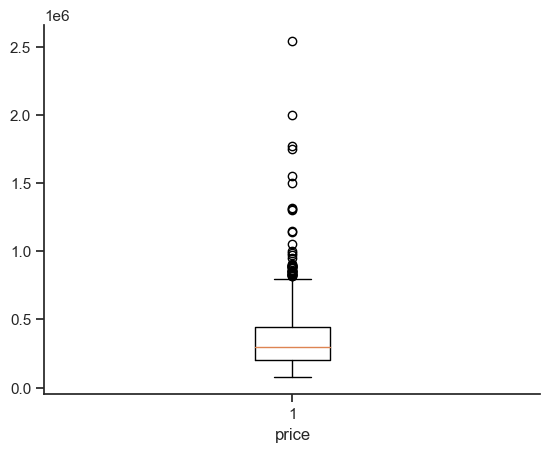

In [53]:
# Erstelle einen Boxplot für die "price"-Variable
plt.boxplot(df['price'])
plt.xlabel('price')
plt.show()

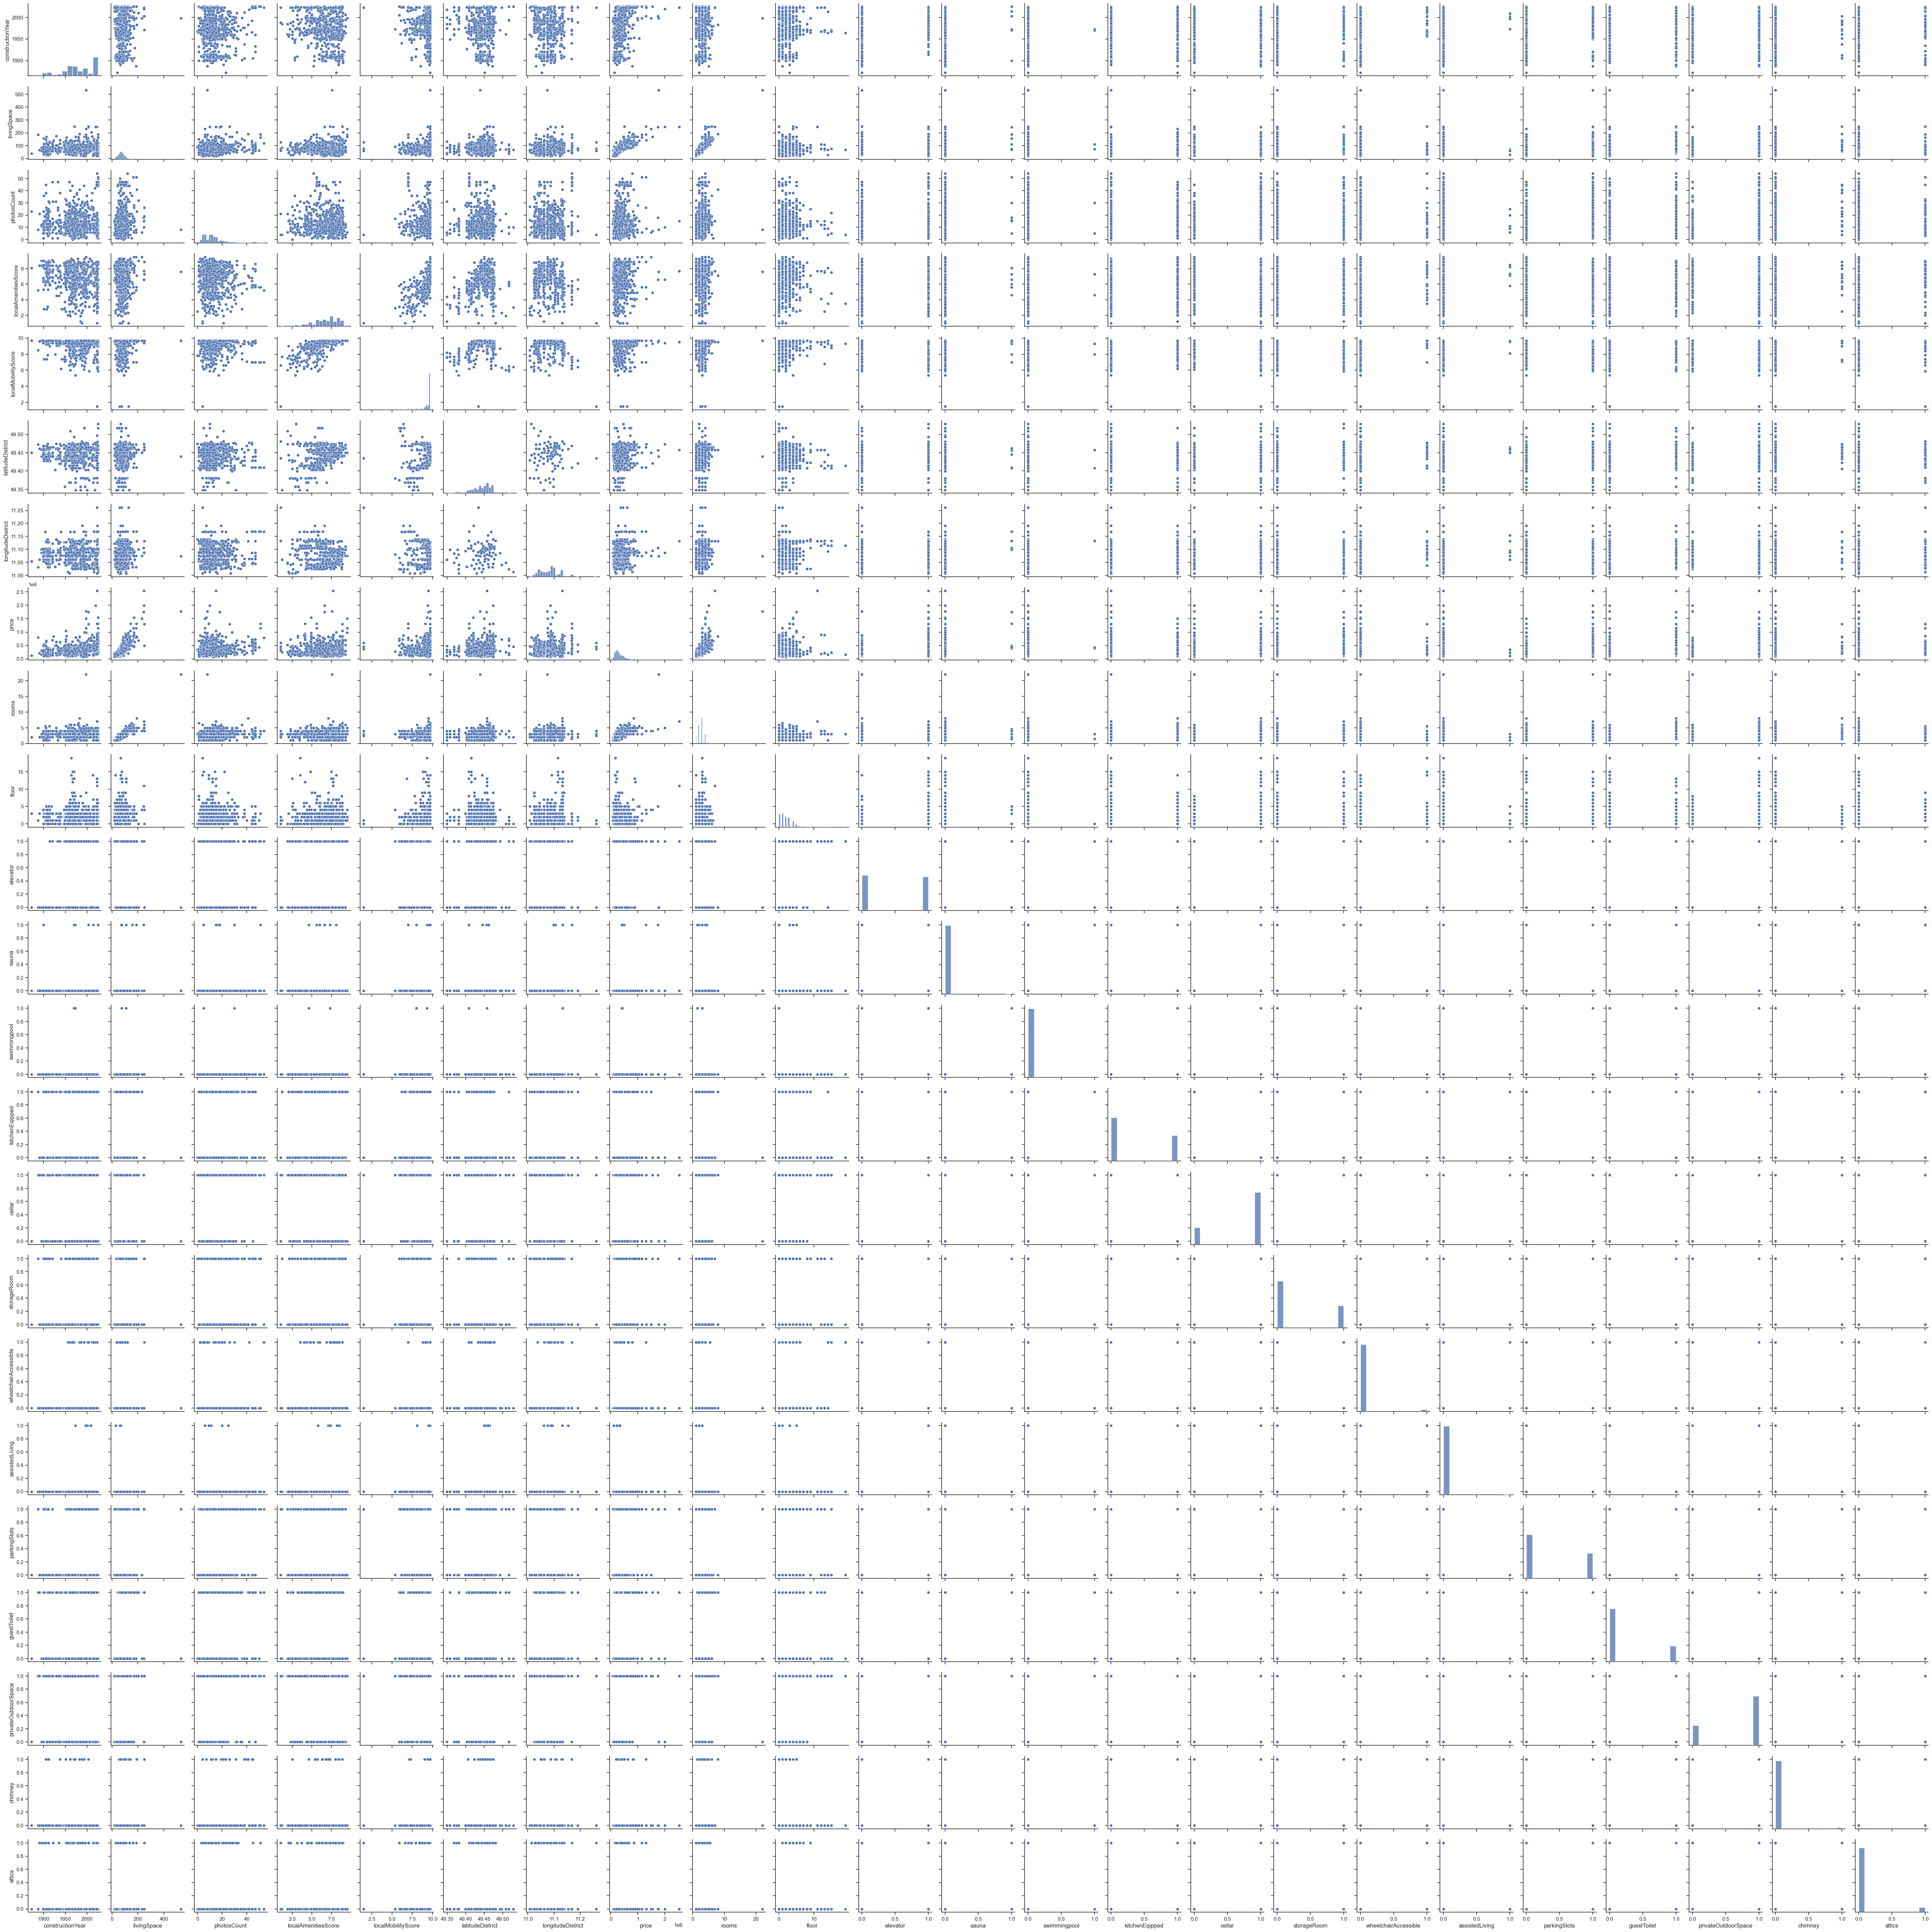

In [54]:
# histogram with seaborn
sns.pairplot(data=df);

In [63]:
# estimate the model and save it as lm (linear model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols("price ~ livingSpace + guestToilet + constructionYear + privateOutdoorSpace + parkingSlots + sauna + elevator + latitudeDistrict + longitudeDistrict", data=data).fit()

In [64]:
# print regression results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     334.8
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.26e-285
Time:                        17:51:37   Log-Likelihood:                -12362.
No. Observations:                 947   AIC:                         2.474e+04
Df Residuals:                     937   BIC:                         2.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.601e+07   7

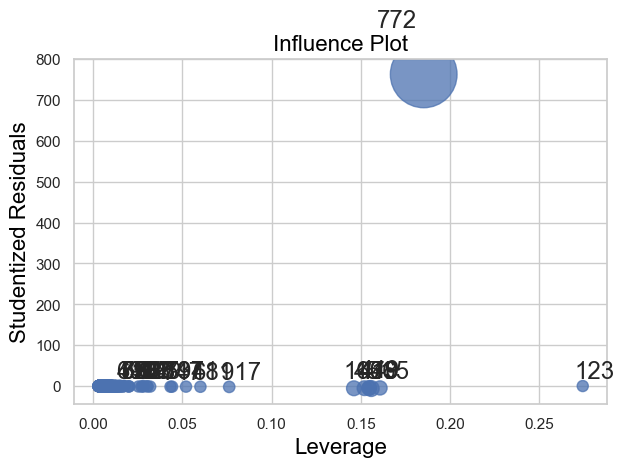

In [49]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [51]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(data["price"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n", 
    lm_cooksd[out_d])

Critical Cooks distance: 0.004219409282700422
Int64Index([160, 365, 413, 449, 451, 481, 539, 687, 756, 758, 781, 873, 928,
            954],
           dtype='int64') 
 [5.90542499e-01 4.73290078e-01 5.07057303e-01 7.91308735e-01
 5.67790412e-01 5.17134392e-01 1.03210273e-02 1.94759508e-02
 1.25308277e-02 5.40706574e-03 2.66574972e+01 4.39665566e-03
 3.85909807e-02 1.11559521e-02]


In [52]:
data = data[data['price'] != 100000000]

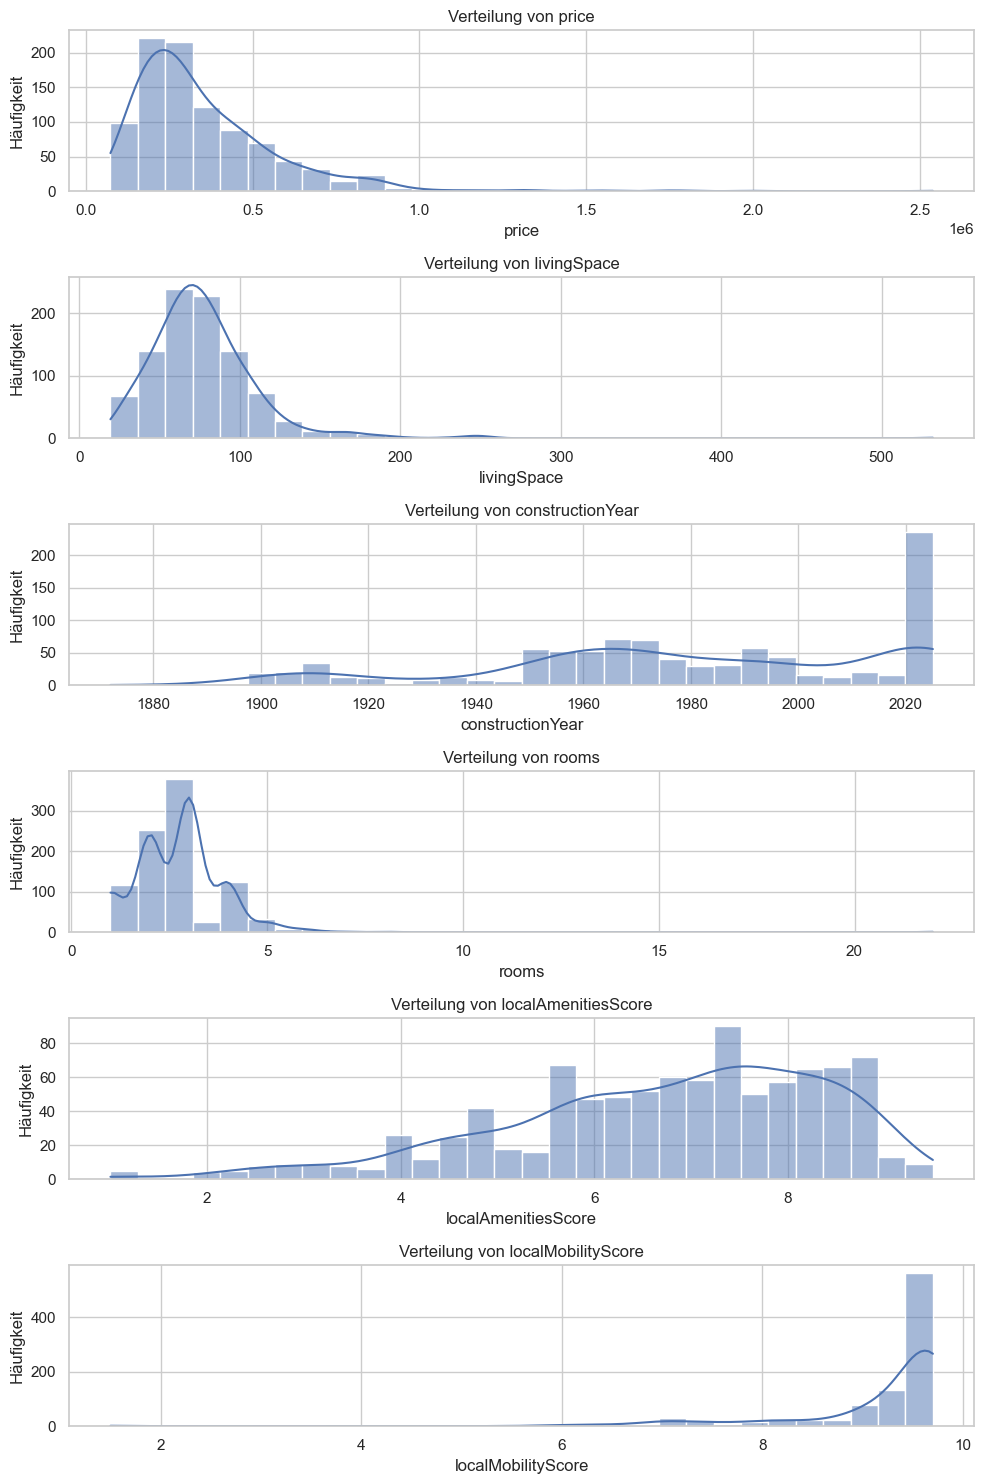

In [53]:
# Einstellen des Stils für die Visualisierungen
sns.set(style="whitegrid")

# Auswahl einiger Schlüsselvariablen für die Visualisierung
keyVariables = ['price', 'livingSpace', 'constructionYear', 'rooms', 'localAmenitiesScore', 'localMobilityScore']

# Erstellen von Histogrammen für diese Variablen
fig, axes = plt.subplots(len(keyVariables), 1, figsize=(10, 15))

for i, var in enumerate(keyVariables):
    sns.histplot(data[var], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Verteilung von {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

C:\Users\papad\AppData\Local\Temp\ipykernel_6212\4075138833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = data.corr()


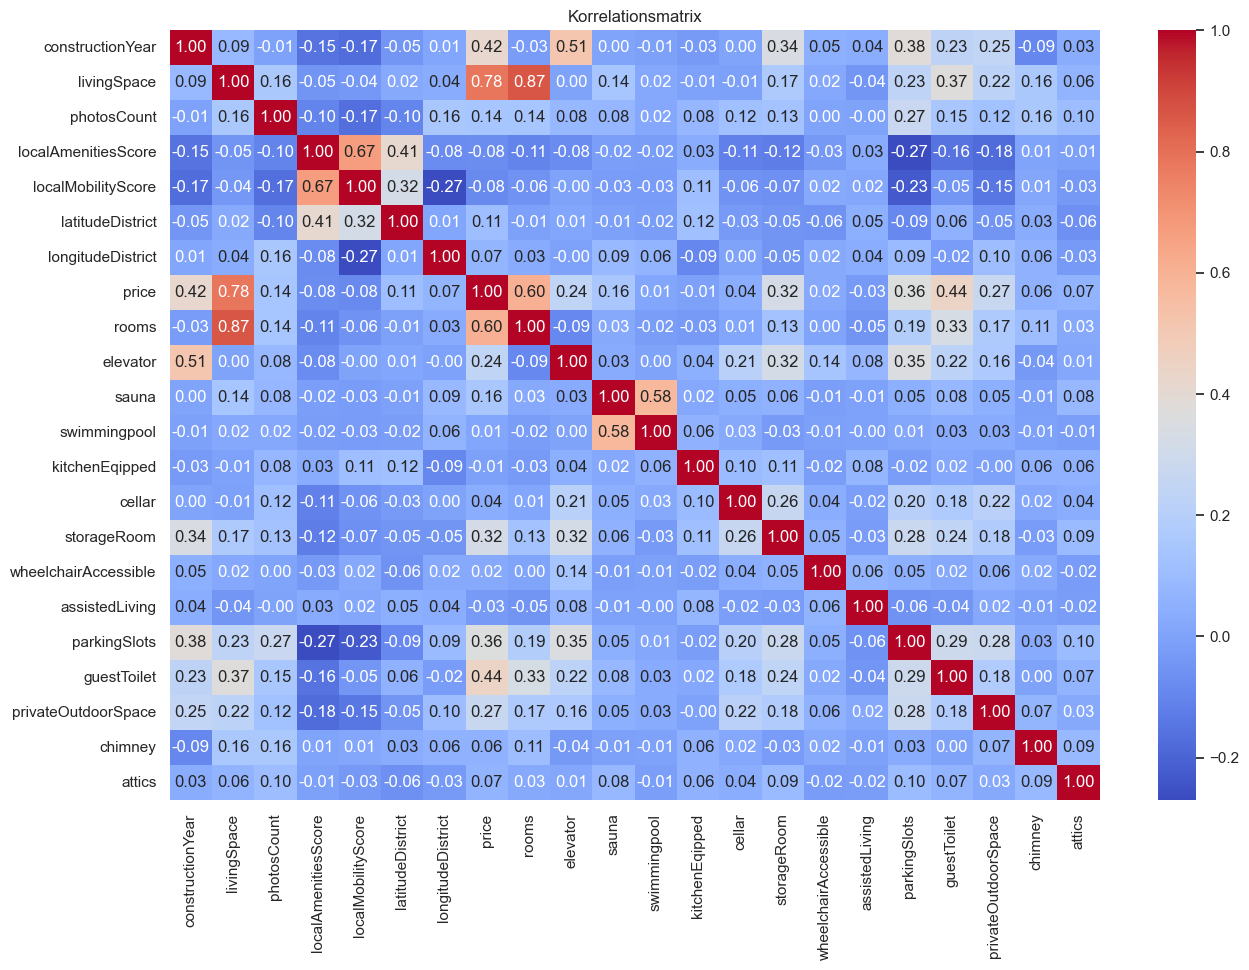

In [54]:
# Erstellen einer Korrelationsmatrix
correlationMatrix = data.corr()

# Visualisierung der Korrelationsmatrix mit einem Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()

In [43]:
# Auswahl der kategorialen Variablen
categoricalVars = ['exposeType', 'district']

# Häufigkeitsanalyse für jede kategoriale Variable
categoricalFrequencies = {var: data[var].value_counts() for var in categoricalVars}

categoricalFrequencies

{'exposeType': standard    773
 project     175
 Name: exposeType, dtype: int64,
 'district': Gostenhof        61
 Steinbühl        51
 Gleißhammer      36
 Mögeldorf        34
 Maxfeld          34
                  ..
 Worzeldorf        1
 Buch              1
 Gaismannshof      1
 Großgründlach     1
 Kraftshof         1
 Name: district, Length: 85, dtype: int64}

In [44]:
# Berechnung des Durchschnittspreises pro Quadratmeter pro Stadtteil
data['pricePerSqm'] = data['price'] / data['livingSpace']
averagePricePerSqmPerDistrict = data.groupby('district')['pricePerSqm'].mean().sort_values(ascending=False)

averagePricePerSqmPerDistrict.head(10)  # Anzeigen der Top 10 Stadtteile nach Durchschnittspreis pro Quadratmeter


district
Eberhardshof            378787.878788
Kleinreuth h d Veste      8139.047619
Rangierbahnhof            7634.891514
Gleißbühl                 7218.747137
Großgründlach             6795.743423
Großreuth h d Veste       6705.478623
Altenfurt                 6571.918860
Buch                      5798.387097
Veilhof                   5759.847128
Brunn                     5585.914648
Name: pricePerSqm, dtype: float64

Der Durchschnittspreis pro Quadratmeter ist für Eberhardshof außergewöhnlich hoch. Dies könnte auf eine Ausreißer-Immobilie mit einem sehr hohen Preis im Vergleich zur Wohnfläche hinweisen.

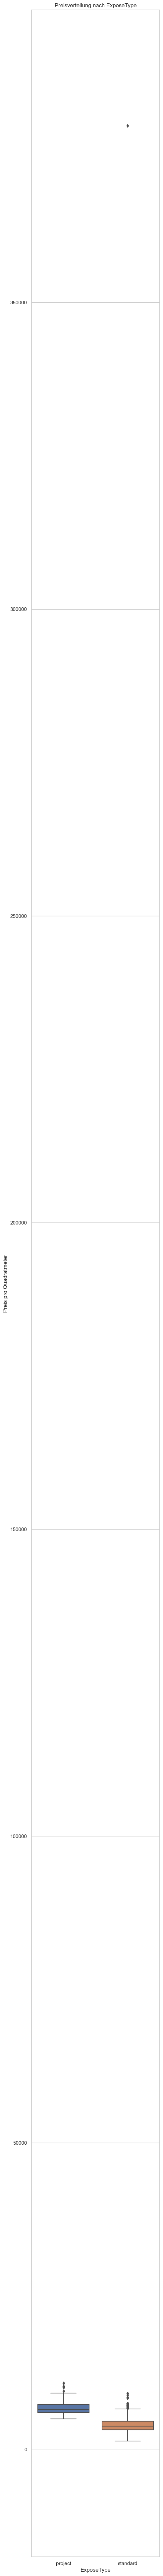

district
Eberhardshof            378787.878788
Kleinreuth h d Veste      8139.047619
Rangierbahnhof            7634.891514
Gleißbühl                 7218.747137
Großgründlach             6795.743423
Großreuth h d Veste       6705.478623
Altenfurt                 6571.918860
Buch                      5798.387097
Veilhof                   5759.847128
Brunn                     5585.914648
Name: pricePerSqm, dtype: float64

In [52]:
# Boxplots für 'exposeType' und deren Beziehung zum Preis
plt.figure(figsize=(5, 100))
sns.boxplot(x='exposeType', y='pricePerSqm', data=data)
plt.title('Preisverteilung nach ExposeType')
plt.xlabel('ExposeType')
plt.ylabel('Preis pro Quadratmeter')
plt.show()

# Berechnung der durchschnittlichen Preise pro Stadtteil
averagePricePerDistrict = data.groupby('district')['pricePerSqm'].mean().sort_values(ascending=False)

# Next steps:
A Umgang mit fehlenden Werten

- Ableitung von energyClass aus energyConsumption, buildingType und energyType  --> Dies würde zu einer Reduzierung der fehlenden Werte führen. Anschließend könnten energyConsumption, buildingType und energyType gelöscht werden, da sie dieselben Informationen enthalten und wahrscheinlich eine hohe Korrelation aufweisen (dies kann auch zuvor überprüft werden).
- Ersatz des fehlenden Werts in photoCount durch "0", da in diesem Fall kein Bild übermittelt wurde.
- Ersatz der fehlenden Werte in den Variablen "elevator" und "parkingSlot" durch "0" mit der Begründung, dass dies als Verkaufsvorteil gilt und daher alle Immobilien, die über einen Aufzug oder Parkplatz verfügen, angegeben wurden.
- Imputation der fehlenden Werte in "LocalAmenities" und "MobilityScore" (finde ähnliche geografische Immobilien im Datensatz und übernehme den Wert).

!!!Um die Regression durchzuführen, dürfen keinerlei fehlende Werte vorhanden sein!!! Im Notfall müssen diese Zeilen gelöscht werden.

- Die folgenden Variablen können gelöscht werden, da zu viele fehlende Werte vorhanden sind: equipments, houseCondition, condition, suitability, usage, category, priceCommoncharge


B Erstellung neuer Variablen

- siehe weiter unten (Lena hat hier bereits sehr gute Arbeit geleistet)
- Stadtteile (distinct) in folgenden Gruppen unterteilen: Nord, Süd, West, Ost, Zentrum (oder eine andere Aufteilung - siehe: https://www.nuernberg.de/internet/statistik/stadtteile.html


C.1 # change data type
df['...'] = pd.Categorical(df['...'])
df['...'] = pd.Categorical(df['...'])
df['...'] = pd.Categorical(df['...'])

C Daten analysieren (in zwei Gruppen: categorial und nummerisch)
 - arithmetisch
 - visuell
 
 Korrelationsmatrix erstellen
 Outlier bestimmen (Begründen: Influencing?)
 
 D Bestimmung notwendiger Variablen um Model zu bauen

In [34]:
# Deskriptive Statistik der numerischen Variablen
numericalSummary = data.describe()

# Prüfen auf fehlende Werte
missingValues = data.isnull().sum()

numericalSummary, missingValues

(       constructionYear  photosCount  localAmenitiesScore  localMobilityScore  \
 count        948.000000   948.000000           948.000000          948.000000   
 mean        1979.180380    13.060127             6.714161            9.175994   
 std           36.543477     9.490815             1.658366            0.919792   
 min         1872.000000     0.000000             1.000000            1.500000   
 25%         1957.000000     7.000000             5.700000            9.100000   
 50%         1977.000000    11.000000             7.000000            9.600000   
 75%         2019.250000    16.000000             8.000000            9.700000   
 max         2025.000000    54.000000             9.500000            9.700000   
 
        latitudeDistrict  longitudeDistrict         price       rooms  \
 count        948.000000         948.000000  9.480000e+02  948.000000   
 mean          49.443439          11.082795  4.633472e+05    2.757911   
 std            0.024613           0.0366

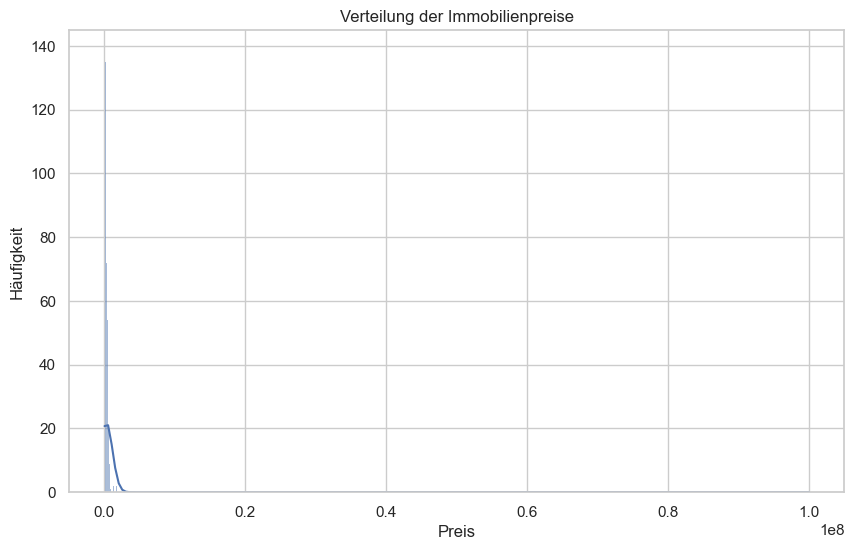

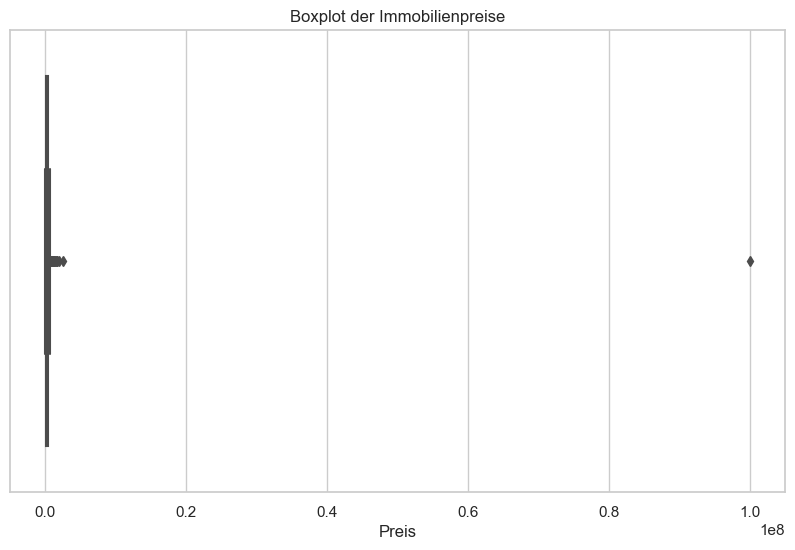

In [35]:
# Einstellung des Visualisierungsstils
sns.set(style="whitegrid")

# Visualisierung der Verteilung des Preises
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Verteilung der Immobilienpreise')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.show()

# Boxplot zur Untersuchung von Ausreißern
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot der Immobilienpreise')
plt.xlabel('Preis')
plt.show()

Fehlende Werte ersetzen

In [ ]:
# oben implmentiert
#df["photosCount"].fillna(0, inplace=True)

In [58]:
# oben implmentiert
#df.drop(columns=["equipments", "houseCondition", "condition", "suitability", "usage", "category", "priceCommoncharge"], inplace=True)

In [ ]:
# oben implmentiert
#df['localAmenitiesScore'] = df.groupby('district')['localAmenitiesScore'].transform(lambda x: x.fillna(x.mean()))
#df['localMobilityScore'] = df.groupby('district')['localMobilityScore'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# oben implmentiert
#df["elevator"] = df["elevator"].notnull().astype(int).fillna(0)

In [ ]:
# oben implmentiert
#df["parkingSlots"] = df["parkingSlots"].notnull().astype(int).fillna(0)

In [ ]:
# zuviele fehlende Variablen
equipments = {
    "möbliert": 1,
    "teilweise möbliert": 2, 
    "neuwertig": 3,
    "teilweise möbliert, neuwertig": 4,
    "möbliert, neuwertig": 5
}

In [ ]:
energyClasses = {
    "DE_ENV2014_CLASS_A_PLUS": 1,
    "DE_ENV2014_CLASS_A": 2,
    "DE_ENV2014_CLASS_B": 3,
    "DE_ENV2014_CLASS_C": 4,
    "DE_ENV2014_CLASS_D": 5,
    "DE_ENV2014_CLASS_E": 6,
    "DE_ENV2014_CLASS_F": 7,
    "DE_ENV2014_CLASS_G": 8,
    "DE_ENV2014_CLASS_H": 9
}
df["energyClass"].replace(energyClasses, inplace=True)


In [ ]:
df.isna().sum()

constructionYear                                           0
livingSpace                                                0
Tealium.object_locationid                                  0
Tealium.object_address_is_visible                          0
Tealium.object_zip                                         0
Tealium.object_currency                                    0
Tealium.object_objektart_sub                               0
Tealium.expose_type                                        0
photosCount                                                0
localAmenitiesScore                                        0
localMobilityScore                                         0
Price.AdditionalInformation.Commission.CommissionType      0
EstateAddress.City                                         0
EstateAddress.ZipCode                                      0
EstateAddress.Street                                     634
Offerer.addressGuid                                        0
Offerer.globalUserId    

In [ ]:
# Only include predictor & response variables
df_pred_resp = df[["constructionYear", "livingSpace",
    "photosCount", "localAmenitiesScore",
    "localMobilityScore", "rooms",
    "energyConsumption", "elevator",
    "price", "energyClass", "district"]
    ].copy()

In [ ]:
df_pred_resp

constructionYear  livingSpace  photosCount  localAmenitiesScore  \
0              2023.0       247.07         15.0                  7.7   
1              1900.0        69.00         23.0                  6.5   
2              1972.0        69.46          1.0                  5.7   
3              2023.0        82.81          6.0                  8.2   
4              2023.0        75.52          6.0                  8.2   
..                ...          ...          ...                  ...   
956            2023.0       110.32         12.0                  7.7   
957            2023.0       103.11          8.0                  7.7   
958            1965.0        91.00          8.0                  4.3   
959            1958.0        34.00         18.0                  8.9   
960            2023.0       117.20         13.0                  7.7   

     localMobilityScore  rooms  energyConsumption  elevator      price  \
0                   9.5    7.0                NaN         1  2539000.0   
1                   9.7    2.0                NaN         1   225000.0   
2                   7.8    3.0                NaN         1   195000.0   
3                   9.6    3.0               24.5         1   483623.0   
4                   9.6    3.0               24.5         1   433956.0   
..                  ...    ...                ...       ...        ...   
956                 9.5    4.0                NaN         1   909000.0   
957                 9.5    4.0                NaN         1   819000.0   
958                 9.3    4.0               91.3         1   295000.0   
959                 9.7    1.0              118.3         1   198000.0   
960                 9.5    4.0                NaN         1   729000.0   

    energyClass      district  
0           NaN     Mögeldorf  
1           NaN   Gibitzenhof  
2           NaN    Langwasser  
3             1  Seeleinsbühl  
4             1  Seeleinsbühl  
..          ...           ...  
956         NaN     Mögeldorf  
957         NaN     Mögeldorf  
958           4   Gibitzenhof  
959           5       Maxfeld  
960         NaN     Mögeldorf  

[948 rows x 11 columns]

In [ ]:
# Mit 100M+ Outlier
alt.Chart(df_pred_resp).mark_boxplot().encode(
    x=alt.X("price:Q").scale(zero=False)
    ).properties(width=1500, height=100)

alt.Chart(...)

In [ ]:
# remove outlier for visualisation
df_pred_resp_vis = df_pred_resp.loc[df_pred_resp["price"] < 80000000]

In [ ]:
# Ohne 100M+ Outlier
alt.Chart(df_pred_resp_vis).mark_boxplot().encode(
    x=alt.X("price:Q").scale(zero=False)
    ).properties(width=1500, height=100)

alt.Chart(...)

In [ ]:
y_labels = ["price", "energyClass"]
x_labels = ["constructionYear", "livingSpace",
            "photosCount", "localAmenitiesScore",
            "localMobilityScore",
            "energyConsumption", "elevator"]

## Analysis

### Descriptive statistics

In [ ]:
df_pred_resp.describe().T

count           mean           std       min        25%  \
constructionYear     948.0    1979.180380  3.654348e+01   1872.00    1957.00   
livingSpace          948.0      77.190264  3.556277e+01     19.35      56.95   
photosCount          948.0      13.060127  9.490815e+00      0.00       7.00   
localAmenitiesScore  948.0       6.714161  1.658366e+00      1.00       5.70   
localMobilityScore   948.0       9.175994  9.197925e-01      1.50       9.10   
rooms                948.0       2.757911  1.216392e+00      1.00       2.00   
energyConsumption    727.0     102.342352  5.431241e+01      0.00      67.60   
elevator             948.0       1.000000  0.000000e+00      1.00       1.00   
price                948.0  463347.173523  3.244513e+06  74000.00  203750.00   

                          50%        75%          max  
constructionYear       1977.0    2019.25       2025.0  
livingSpace              73.0      90.00        532.0  
photosCount              11.0      16.00         54.0  
localAmenitiesScore       7.0       8.00          9.5  
localMobilityScore        9.6       9.70          9.7  
rooms                     3.0       3.00         22.0  
energyConsumption       103.3     135.25        326.0  
elevator                  1.0       1.00          1.0  
price                295000.0  445175.00  100000000.0

### Exploratory data analysis

In [ ]:
alt.renderers.enable('html')
alt.Chart(df_pred_resp_vis).mark_circle().encode(
    x=alt.X(alt.repeat("column"), 
            type='quantitative',
            scale=alt.Scale(zero=False)
            ),
    y=alt.Y(alt.repeat("row"), 
            type='quantitative',
            scale=alt.Scale(zero=False)
             )
).properties(
    width=150,
    height=150
).repeat(
    row=y_labels,
    column=x_labels
)

alt.RepeatChart(...)

### Relationships

## Model

### Select model

In [ ]:
df_pred_resp[y_labels]

price energyClass
0    2539000.0         NaN
1     225000.0         NaN
2     195000.0         NaN
3     483623.0           1
4     433956.0           1
..         ...         ...
956   909000.0         NaN
957   819000.0         NaN
958   295000.0           4
959   198000.0           5
960   729000.0         NaN

[948 rows x 2 columns]

In [ ]:
import statsmodels.api as sm

#X = sm.add_constant(df_pred_resp[["constructionYear", "livingSpace",  "localAmenitiesScore", "localMobilityScore", "elevator"]])
X = sm.add_constant(df_pred_resp[["constructionYear", "livingSpace", "elevator"]])
model = sm.OLS(df_pred_resp["price"], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     26.45
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.68e-12
Time:                        17:38:58   Log-Likelihood:                -15532.
No. Observations:                 948   AIC:                         3.107e+04
Df Residuals:                     945   BIC:                         3.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
constructionYear  4116.1946   2822.688      1.458      0.145   -1423.267    9655.657
livingSpace       2.019e+04   2900.529      6.960      0.000    1.45e+04    2.59e+04
elevator         -9.242e+06   5.57e+06     -1.659      0.097   -2.02e+07    1.69e+06
==============================================================================
Omnibus:                     2526.107   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31092545.704
Skew:                          29.298   Prob(JB):                         0.00
Kurtosis:                     888.279   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_pred_resp["predicted"] = model.predict()

In [ ]:
data = ((df_pred_resp["predicted"] - df_pred_resp["price"])/df_pred_resp["price"])*100
#data = df_pred_resp["predicted"] - df_pred_resp["price"]
#sns.scatterplot(data=data)
import plotly.express as px
px.scatter(data)

### Training and validation

### Fit model

### Evaluation on test set

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions